# Exploring Drowsiness Patterns in Wearable Device Data

Dataset Details-

Columns:
- heartRate: Heart rate readings from the smartwatch sensors.
- ppgGreen, ppgRed, ppgIR: PPG (Photoplethysmography) sensor readings in green, red, and infrared wavelengths respectively.
- drowsiness: Label indicating the level of drowsiness based on an adapted Karolinska Sleepiness Scale (KSS). Values range from 0.0 to 2.0, where 0.0 represents alertness and 2.0 represents significant drowsiness.

Dataset Access: 

• Link :https://www.kaggle.com/datasets/vitoraugustx/drowsiness-dataset

• Download Instructions:
1. Visit the provided Kaggle dataset link.
2. Sign in to your Kaggle account (or create one if you don't have it).
3. Click on the "Download" button to download the dataset (drowsiness_dataset.csv).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid', palette='dark')
sns.set_palette('Purples')

In [4]:
#importing data
data = pd.read_csv('C:/Users/ME/oeson/EDA Project- healthcare/drowsiness_dataset.csv')
data.head()

,heartRate,ppgGreen,ppgRed,ppgIR,drowsiness
0,54.0,1584091.0,5970731.0,6388383.0,0.0
1,54.0,1584091.0,5971202.0,6392174.0,0.0
2,54.0,1581111.0,5971295.0,6391469.0,0.0
3,54.0,1579343.0,5972599.0,6396137.0,0.0
4,54.0,1579321.0,5971906.0,6392898.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890260 entries, 0 to 4890259
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   heartRate   float64
 1   ppgGreen    float64
 2   ppgRed      float64
 3   ppgIR       float64
 4   drowsiness  float64
dtypes: float64(5)
memory usage: 186.5 MB


In [6]:
data.nunique()

heartRate          70
ppgGreen      1212086
ppgRed        1163407
ppgIR         1221554
drowsiness          3
dtype: int64

In [15]:
data.duplicated().sum()

2494973

In [12]:
#statistical summary
data.describe(include='all')

,heartRate,ppgGreen,ppgRed,ppgIR,drowsiness
count,4.890260e+06,4.890260e+06,4.890260e+06,4.890260e+06,4.890260e+06
mean,7.814245e+01,2.073589e+06,5.643653e+06,5.728191e+06,8.593592e-01
std,1.296635e+01,4.418773e+05,3.909626e+05,4.313052e+05,8.370285e-01
min,5.000000e+01,5.897580e+05,4.441989e+06,4.409976e+06,0.000000e+00
25%,6.800000e+01,1.780621e+06,5.368700e+06,5.402542e+06,0.000000e+00
50%,7.800000e+01,2.044658e+06,5.646039e+06,5.818748e+06,1.000000e+00
75%,8.700000e+01,2.333117e+06,5.927128e+06,6.016016e+06,2.000000e+00
max,1.190000e+02,3.530798e+06,6.842637e+06,7.061799e+06,2.000000e+00


In [13]:
data.isnull().sum()

heartRate     0
ppgGreen      0
ppgRed        0
ppgIR         0
drowsiness    0
dtype: int64

In [14]:
data.duplicated().sum()

2494973

# Univariate Analysis

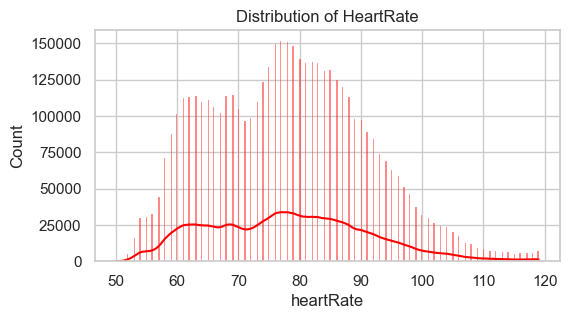

In [25]:
#distribution of drowsiness cases
plt.figure(figsize=(6,3))
sns.histplot(data['heartRate'], kde= True, color='Red')
plt.title('Distribution of HeartRate')
plt.show()

- As we can see the most heart rate range lies btw 60-90
- Highest peak of graph is between 70-80, which means most of the people have heart rate btw70-80
- Shape of distribution is right skewed. (HR above 90 are very common) (very few peolpe have it btw 100-120

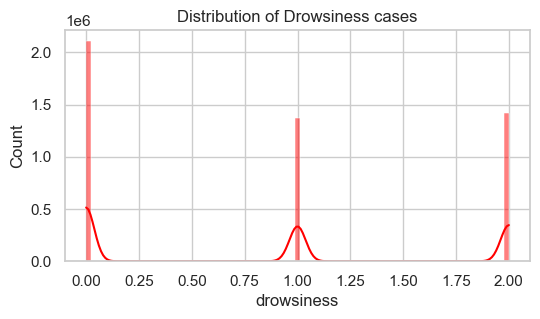

In [37]:
#distribution of drowsiness cases
plt.figure(figsize=(6,3))
sns.histplot(data['drowsiness'], kde= True, color='red')
plt.title('Distribution of Drowsiness cases')
plt.show()

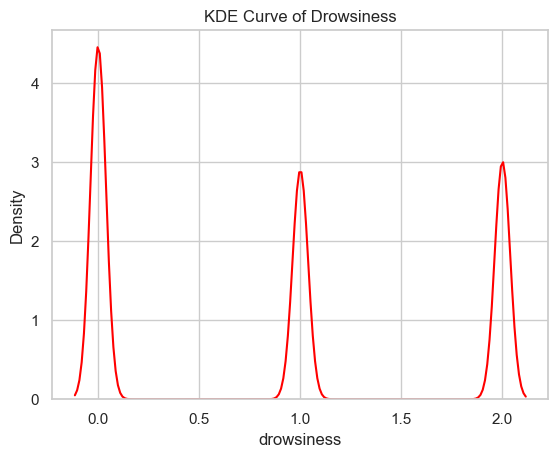

In [38]:
sns.kdeplot(data['drowsiness'], color='red')
plt.title("KDE Curve of Drowsiness")
plt.show()

- 0 means no drowsiness
- 1 means modeate
- 2 means high drowsiness
- Now the graphs shows only 3 distinct bar, because it grouped the values into bins
- The kde curve which is btw 0.2 till 1 and then till 2 (close to 0)shows that there are only few or data points which lie here.


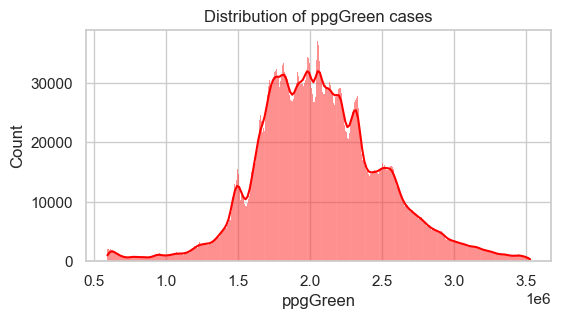

In [40]:
#distribution of drowsiness cases
plt.figure(figsize=(6,3))
sns.histplot(data['ppgGreen'], kde= True, color='red')
plt.title('Distribution of ppgGreen cases')
plt.show()

- shows shightly normal distribution
- slightly right skewwd
- most of the values lies btw 1.8 to 2.5. 

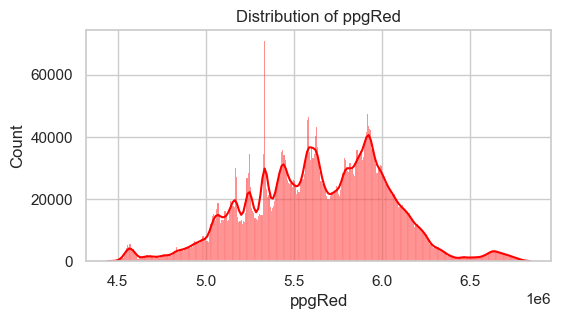

In [79]:
#distribution of drowsiness cases
plt.figure(figsize=(6,3))
sns.histplot(data['ppgRed'], kde= True, color='red')
plt.title('Distribution of ppgRed')
plt.show()

- positively skewed
- high peak is observed around 5.3e6 which means that the majority of red signal values are clustered around this range.
- some small spikes could  be due to more variability.

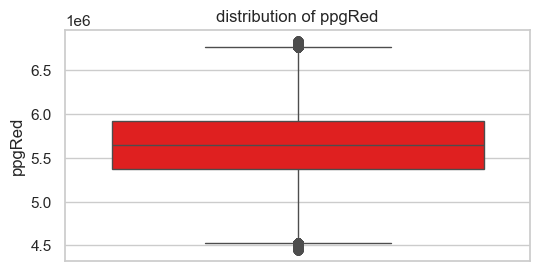

In [80]:
plt.figure(figsize=(6,3))
sns.boxplot(y=data['ppgRed'], color='red')
plt.title('distribution of ppgRed')
plt.show()

- Minimum Value: Around 4.5 million.
- Lower Quartile (Q1): Around 5.3 million.
- Median (50th Percentile): Around 5.7 million.
- Upper Quartile (Q3): Around 5.9 million.
- Maximum Value: Around 6.7 million
- NO OUTLIERS

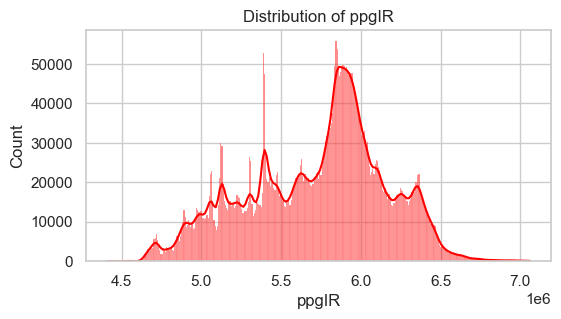

In [82]:
#distribution of drowsiness cases
plt.figure(figsize=(6,3))
sns.histplot(data['ppgIR'], kde= True, color='red')
plt.title('Distribution of ppgIR')
plt.show()

- positivelt skewed
- high oeak around 6.0e6 means most of the infrared signal values are concentrated here.
- smaller hikes represent few variations in the readings which could be due to changes in blood flow or something else.

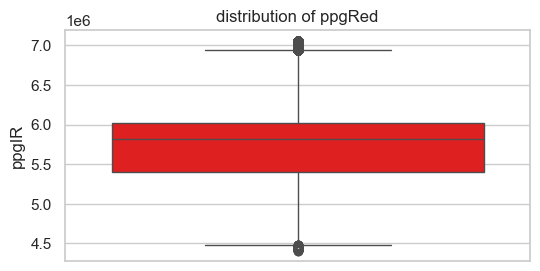

In [83]:
plt.figure(figsize=(6,3))
sns.boxplot(y=data['ppgIR'], color='red')
plt.title('distribution of ppgRed')
plt.show()

- multi modal distribution (multiple peaks)
- slightly right skewed
- no outliers
- median- 5.8

# Bivariate Analysis

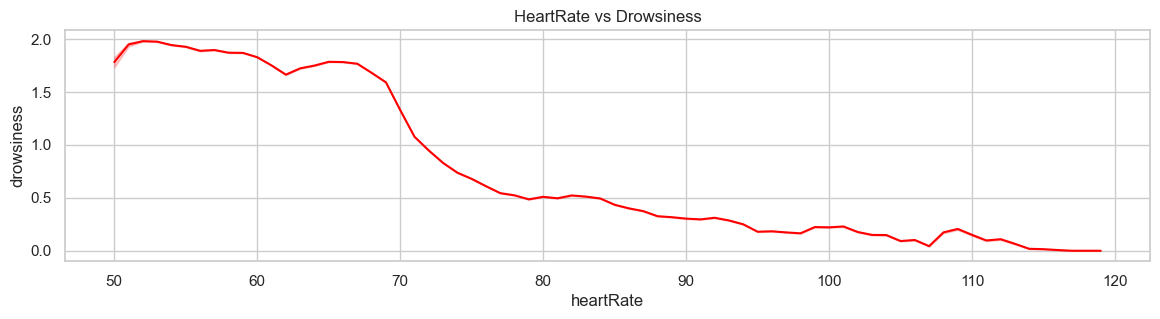

In [49]:
#heartrate vs drowsiness 
import matplotlib.ticker as ticker

plt.figure(figsize=(14,3))
sns.lineplot(x='heartRate', y='drowsiness', data=data, color='red')
plt.title('HeartRate vs Drowsiness')
#plt.xticks(rotation=90)
plt.show()

In [50]:
correlation= data['heartRate'].corr(data['drowsiness'])
print('correlation', correlation)

correlation -0.6759093115534813


- HeartRate  has highly negative correlation btw drowsiness (which means, when heart rate increases drowsiness decreases and vice versa)


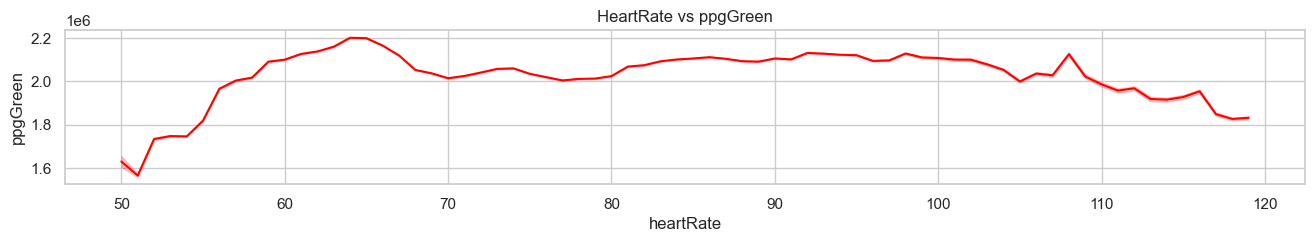

In [31]:
plt.figure(figsize=(16,2))
sns.lineplot(x='heartRate', y='ppgGreen', data=data, color='red')
plt.title('HeartRate vs ppgGreen')
#plt.xticks(rotation=90)
plt.show()

In [33]:
correlation= data['heartRate'].corr(data['ppgGreen'])
print('correlation', correlation)

correlation 0.008515543133984288


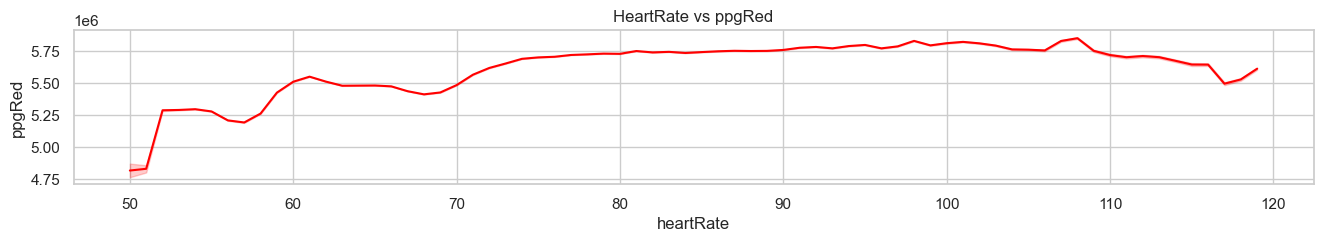

In [35]:
plt.figure(figsize=(16,2))
sns.lineplot(x='heartRate', y='ppgRed', data=data, color='red')
plt.title('HeartRate vs ppgRed')
#plt.xticks(rotation=90)
plt.show()

In [39]:
correlation= data['heartRate'].corr(data['ppgRed'])
print('correlation', correlation)

correlation 0.3197542237496718


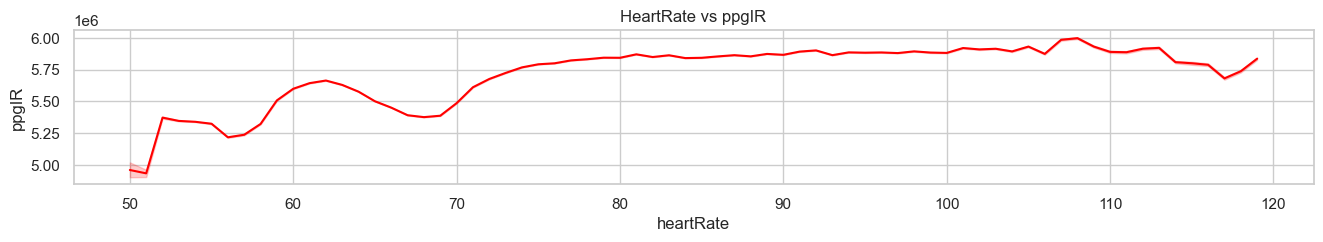

In [29]:
plt.figure(figsize=(16,2))
sns.lineplot(x='heartRate', y='ppgIR', data=data, color='red')
plt.title('HeartRate vs ppgIR')
#plt.xticks(rotation=90)
plt.show()

In [57]:
correlation= data['heartRate'].corr(data['ppgIR'])
print('correlation', correlation)

correlation 0.3442914919125487


- so when i checked the correltiaon of hr with red light it was 0.32 which is less than 0.34 i.e. IR light. so i choose IR as it has stronger relation than red

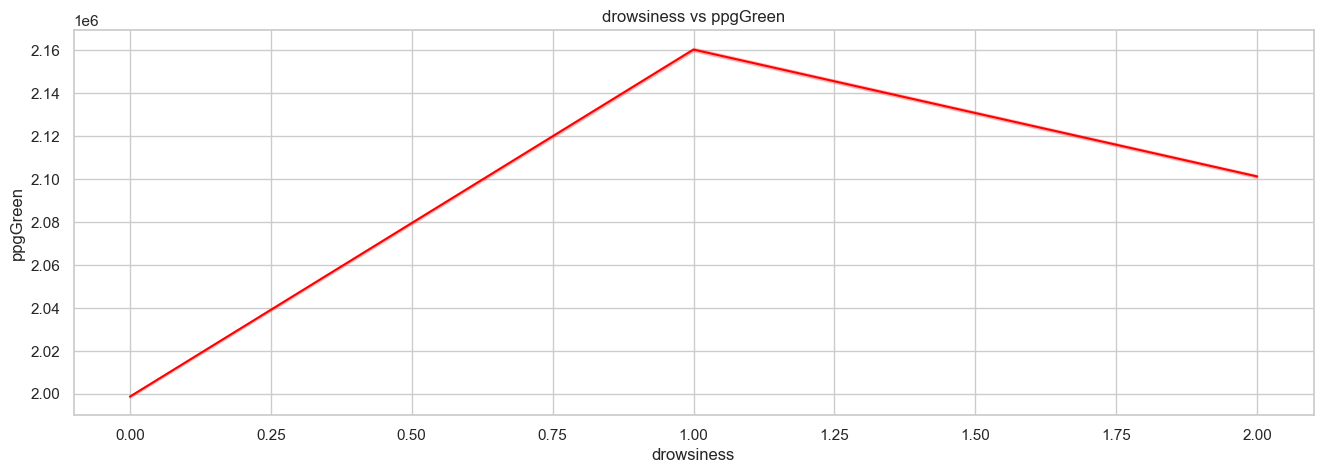

In [41]:
plt.figure(figsize=(16,5))
sns.lineplot(x='drowsiness', y='ppgGreen', data=data, color='red')
plt.title('drowsiness vs ppgGreen')
#plt.xticks(rotation=90)
plt.show()

In [43]:
correlation= data['drowsiness'].corr(data['ppgGreen'])
print('correlation', correlation)

correlation 0.1087883495372927


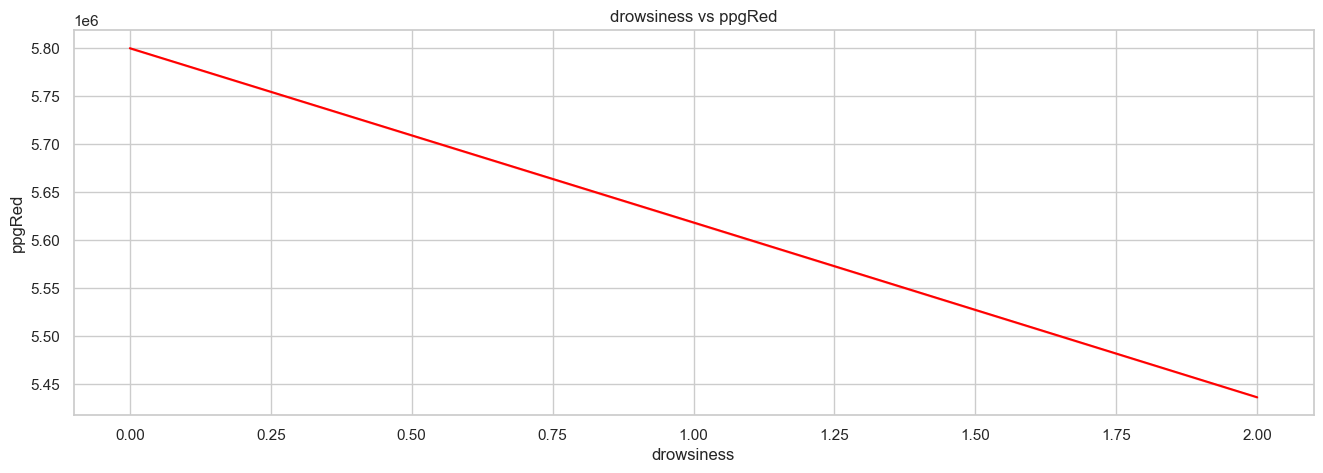

In [59]:
plt.figure(figsize=(16,5))
sns.lineplot(x='drowsiness', y='ppgRed', data=data, color='red')
plt.title('drowsiness vs ppgRed')
#plt.xticks(rotation=90)
plt.show()

In [60]:
correlation= data['drowsiness'].corr(data['ppgRed'])
print('correlation', correlation)

correlation -0.38914798778181814


- as per the above graph, the less the drowsiness is, wavelength of red light is on peak

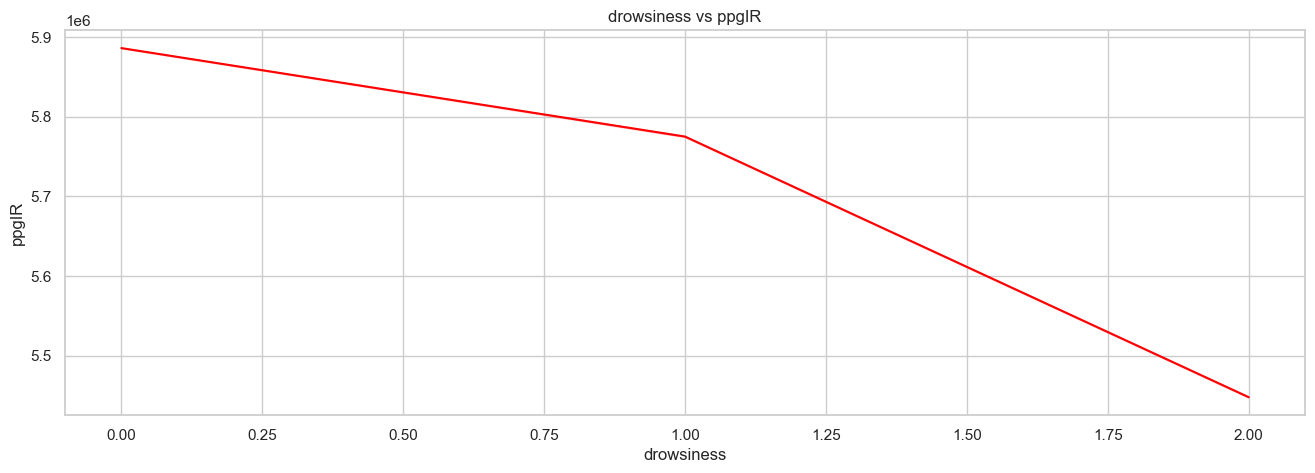

In [62]:
plt.figure(figsize=(16,5))
sns.lineplot(x='drowsiness', y='ppgIR', data=data, color='red')
plt.title('drowsiness vs ppgIR')
#plt.xticks(rotation=90)
plt.show()

In [63]:
correlation= data['drowsiness'].corr(data['ppgIR'])
print('correlation', correlation)

correlation -0.4134691210457997


- as per the above graph, it is same as red light, but when person is in moderate drowsiness, there is a sudden fall in infra red light wavelength
- as per the correlation, red light has little less neagative correlaiton with drowsiness than IR.

Debugging Matrix
             heartRate  ppgGreen    ppgRed     ppgIR  drowsiness
heartRate    1.000000  0.008516  0.319754  0.344291   -0.675909
ppgGreen     0.008516  1.000000  0.453679  0.263743    0.108788
ppgRed       0.319754  0.453679  1.000000  0.768679   -0.389148
ppgIR        0.344291  0.263743  0.768679  1.000000   -0.413469
drowsiness  -0.675909  0.108788 -0.389148 -0.413469    1.000000


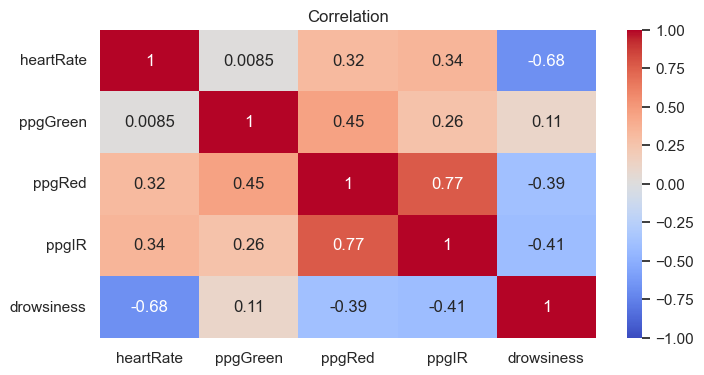

In [55]:
#correlation matrix

#check for constant columns are remove them
valid_numeric_columns = [col for col in data if data[col].nunique() > 1]


#generate detailed descriptive statistics for numeric columns
descriptive_stats= data[valid_numeric_columns].describe()

#compute correltaion only for valid numeric columns
correlation_matrix = data[valid_numeric_columns].corr()

#debugging step: print correlaiton matrix
print('Debugging Matrix\n', correlation_matrix)

#generate heatmap
if not correlation_matrix.isnull().all().all():
    plt.figure(figsize=(8,4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation')
    plt.show()
else:
    print("No valid correlations to display. All columns may contain constant values or NaNs.")
   


In [ ]:
sns.violinplot(x='drowsiness', y='ppgRed', data=data, color='red')
plt.title("PPG Red Signal vs Drowsiness Levels")
plt.show()

From above graph i can conclude, when drowsiness=0, graph is more spread nearvalue of 6 and extreme lower value at 4.5
drowsiness=1 , values are still spread out but still narrower than 0
drowsiness=2 , most values are around 5.5  
Overall, from 0 to 2 the ppged value decreases. might be because the blood flow is high when it is equal to 0 and  when bf=slow d=2

In [128]:
#Split the data

moderate : data['heartRate'] <= 80
high : data[(data['heartRate'] > 80) & (data['heartRate'] <= 120)]

print(f"Size of moderate group: {len(moderate)}")
print(f"Size of high group: {len(high)}")

Size of moderate group: 2821124
Size of high group: 4890260


In [130]:
# T-Test

from scipy.stats import ttest_ind, chi2_contingency, f_oneway

ttest_results = {
    col: ttest_ind(moderate[col] , high[col], equal_var=False, nan_policy='omit')
    for col in valid_numeric_columns
}

for col, result in ttest_results.items():
    print(f' {col} : t-statistics = {result.statistic:.4f}, p_value = {result.pvalue:.4f}')
    

 heartRate : t-statistics = -1235.6582, p_value = 0.0000
 ppgGreen : t-statistics = -41.7198, p_value = 0.0000
 ppgRed : t-statistics = -312.0721, p_value = 0.0000
 ppgIR : t-statistics = -322.9015, p_value = 0.0000
 drowsiness : t-statistics = 618.9681, p_value = 0.0000


- heartRate, ppgGreen, ppgRed, and ppgIR increase as heart rate moves from the "moderate" to the "high" group.(-ve values)
- Drowsiness, on the other hand, decreases in the "high" heart rate group.(+ve values)
- p value is less than 0.005 so there is a significant difference btw both groups

In [142]:
#chi2 Test

drowsiness_mean = data['drowsiness'].mean()
heartRate_mean = data['heartRate'].mean()

data['Drowsiness']=np.where(data['drowsiness'] > drowsiness_mean, 'High', 'Low')
data['HeartRate']=np.where(data['heartRate'] > heartRate_mean, 'High', 'Low')

table = pd.crosstab(data['Drowsiness'], data['HeartRate'])
#print(table)

chi2, chi_p, dof,expected = chi2_contingency(table)
print(f'chi-Square {chi2}, p_value {chi_p}, Degree of Freedom {dof}')

chi-Square 1022625.4467452395, p_value 0.0, Degree of Freedom 1


- This high value of Chi square suggests that these two variables are not independent.
- p value=0 signifies that this relation is statistically significant not by any random chance.
- Degree of freedon tells that we had 2 rows and columns.(2-1)*(2-1)=1